# Teste de modelos

In [1]:
# Manipulação dos dados
import numpy  as np
import scipy  as sp
import pandas as pd

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn           as sns
%matplotlib inline

In [2]:
# Carregando os dados
data_treinamento = pd.read_csv('../../Dados/treinamento-one-hot.csv')

# Carregando os dados
data_teste = pd.read_csv('../../Dados/teste-one-hot.csv')

In [3]:
# Visualização da tabela
data_treinamento.head(5)

,desfecho,TTO_anterior_TB_triagem_enfermeiro,Cicatriz_BCG,Idade,Sexo,Raça,Tem_companheiro,Tosse,Semanas_tosse,Expectoração,...,CAGE,Estado_civil_Casado,Estado_civil_Separado,Estado_civil_Solteiro,Estado_civil_ignorado,Estado_civil_viúvo,Fuma_Ex-fumante,Fuma_Fumante,Fuma_Jamais fumante,Fuma_ignorado
0,TB+,Sim,Sim,30,Masculino,Não branco,Não,Sim,ignorado,Não,...,Não,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,TB+,Sim,ignorado,53,Feminino,Branco,Não,Sim,Não,Sim,...,Não,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,TB+,Não,Sim,18,Feminino,Branco,Sim,Sim,Sim,Não,...,Não,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,TB+,Não,Não,26,Masculino,Branco,Sim,Sim,Sim,Sim,...,Não,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,TB+,Não,Sim,22,Feminino,Branco,Não,Sim,Não,Não,...,Não,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [4]:
data_treinamento.shape

(2182, 32)

In [5]:
# Visualização da tabela
data_teste.head(5)

,desfecho,TTO_anterior_TB_triagem_enfermeiro,Cicatriz_BCG,Idade,Sexo,Raça,Tem_companheiro,Tosse,Semanas_tosse,Expectoração,...,CAGE,Estado_civil_Casado,Estado_civil_Separado,Estado_civil_Solteiro,Estado_civil_ignorado,Estado_civil_viúvo,Fuma_Ex-fumante,Fuma_Fumante,Fuma_Jamais fumante,Fuma_ignorado
0,TB+,Não,Não,52,Masculino,Não branco,Sim,Sim,Sim,Sim,...,Sim,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,TB+,Não,Não,18,Feminino,Branco,Sim,Sim,Sim,Sim,...,Sim,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,TB+,Sim,ignorado,27,Masculino,Não branco,Sim,Sim,Sim,Não,...,Não,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,TB+,Sim,Sim,46,Masculino,Não branco,Não,Sim,Sim,Sim,...,Não,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,TB+,Não,Sim,38,Feminino,Não branco,Não,Sim,Sim,Sim,...,Não,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [6]:
data_teste.shape

(545, 32)

## 1. Pré-processamento dos dados

In [7]:
# # Cálculo de Odds e Odds Ratio, seguindo a tabela usando A,B,C,D
# odds_ratio = dict()

# for feature in list(dados_modelo.columns)[1:]:
    
#     # Cálculo de Odds positivo : Razão dos casos para o caso do sintoma presente
#     a = len(dados_modelo[(dados_modelo.desfecho == 'TB+') & (dados_modelo[feature] == 'Sim')])
#     c = len(dados_modelo[(dados_modelo.desfecho == 'TB-') & (dados_modelo[feature] == 'Sim')])
#     odds_positivo = a/c
    
#     # Cálculo de Odds negativo : Razão dos casos para o caso do sintoma ausente
#     b = len(dados_modelo[(dados_modelo.desfecho == 'TB+') & (dados_modelo[feature] == 'Não')])
#     d = len(dados_modelo[(dados_modelo.desfecho == 'TB-') & (dados_modelo[feature] == 'Não')])
#     odds_negativo = b/d
    
#     odds_ratio[feature] = (odds_positivo) / (odds_negativo)

In [8]:
# # Criando DataFrame para Odds Ratio

# odds_table = pd.DataFrame.from_dict(odds_ratio,orient='index')
# odds_table.rename(index=str,columns={0 : 'Odds_Ratio'},inplace=True)
# odds_table.T

In [9]:
# Pré-processamento para o treinamento
y = data_treinamento.desfecho
X = data_treinamento.drop(['desfecho'],axis=1) 

y = y.replace(['TB+','TB-'],[1,0])
X = X.replace(['Sim','Não','ignorado','Branco','Não branco','Masculino', 'Feminino'],[+1,-1,0,1,0,1,0])

In [17]:
# Pré-processamento para o teste
y_test = data_teste.desfecho.replace(['TB+','TB-'],[1,0])
X_test = data_teste.drop(['desfecho'],axis=1) 

# y = y.replace(['TB+'],['TB],)
X_test = X_test.replace(['Sim','Não','ignorado','Branco','Não branco','Masculino', 'Feminino'],[+1,-1,0,1,0,1,0])

## 2. Teste de Modelos

In [26]:
from sklearn.tree import DecisionTreeClassifier as DT
clf = DT()

In [27]:
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [28]:
y_pred = clf.predict(X_test)

In [29]:
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, confusion_matrix
precision_recall_fscore_support(y_test, y_pred)

(array([ 0.70603675,  0.42073171]),
 array([ 0.73901099,  0.38121547]),
 array([ 0.72214765,  0.4       ]),
 array([364, 181]))

In [30]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()

In [31]:
confusion_matrix(y_test,y_pred)

array([[269,  95],
       [112,  69]])

In [32]:
sensi = (tp/(tp + fn))
sensi

0.38121546961325969

In [33]:
speci = (tn/(tn + fp))
speci

0.73901098901098905

In [34]:
roc_auc_score(y_test,y_pred)

0.56011322931212437

In [39]:
y_pred = y_pred.replace(['TB+','TB-'],[1,0])
y_test = y_test.replace(['TB+','TB-'],[1,0])

AttributeError: 'numpy.ndarray' object has no attribute 'replace'

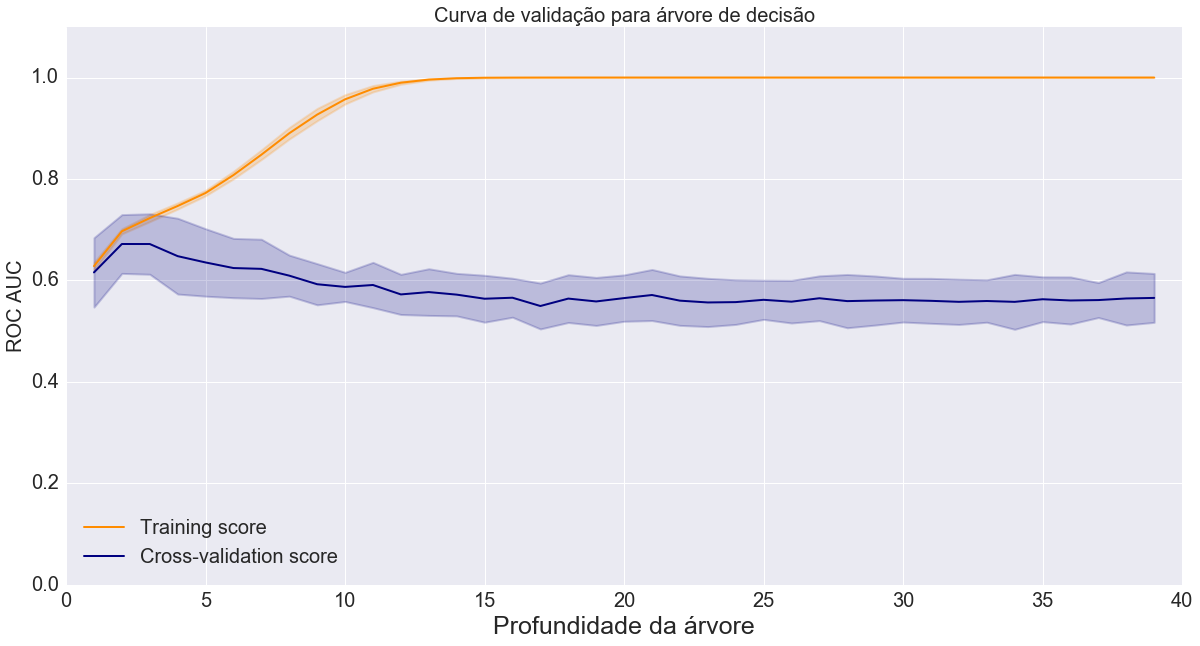

In [76]:
from sklearn.model_selection import validation_curve

param_range = list(range(1,40))
train_scores, test_scores = validation_curve(
    DT(), X, y, param_name='max_depth', param_range=param_range,
    cv=10, scoring="roc_auc", n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std  = np.std(train_scores, axis=1)
test_scores_mean  = np.mean(test_scores, axis=1)
test_scores_std   = np.std(test_scores, axis=1)

plt.figure(figsize=(20,10))
plt.title("Curva de validação para árvore de decisão",fontsize=20)
plt.xlabel("Profundidade da árvore",fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("ROC AUC",fontsize=20)
plt.ylim(0.0, 1.1)
lw = 2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best",fontsize=20)
plt.show()

In [ ]:
# No conjunto de teste...

In [57]:
from scipy.stats import f_oneway

In [77]:
test_scores[0:5]

array([[ 0.54115942,  0.54768116,  0.68407742,  0.64463574,  0.59240346,
         0.69925105,  0.57873748,  0.74165937,  0.58719969,  0.54158156],
       [ 0.61024155,  0.63869565,  0.73139772,  0.70698376,  0.62469604,
         0.68329929,  0.73990857,  0.76568427,  0.6160393 ,  0.60130338],
       [ 0.58975845,  0.65009662,  0.72278961,  0.70985313,  0.59264663,
         0.70941543,  0.69443634,  0.78518627,  0.62746815,  0.63627079],
       [ 0.58492754,  0.68681159,  0.7403949 ,  0.72643712,  0.61516389,
         0.66491586,  0.497082  ,  0.74063807,  0.62177804,  0.60062251],
       [ 0.62811594,  0.65429952,  0.70970723,  0.69253964,  0.58219045,
         0.64346853,  0.48745258,  0.72974419,  0.62707908,  0.59989301]])

In [78]:
depth1 = test_scores[0]
depth2 = test_scores[1]
depth3 = test_scores[2]
depth4 = test_scores[3]
depth5 = test_scores[4]

In [79]:
f_oneway(depth1,depth2,depth3,depth4,depth5)

F_onewayResult(statistic=1.21110079471703, pvalue=0.31934897937768064)

In [82]:
clf = DT(max_depth=1)

clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [87]:
clf.feature_importances_

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.])

In [89]:
X.columns[15]

'Perda_peso_10percent'

In [103]:
X


,TTO_anterior_TB_triagem_enfermeiro,Cicatriz_BCG,Idade,Sexo,Raça,Tem_companheiro,Tosse,Semanas_tosse,Expectoração,Hemoptóicos,...,CAGE,Estado_civil_Casado,Estado_civil_Separado,Estado_civil_Solteiro,Estado_civil_ignorado,Estado_civil_viúvo,Fuma_Ex-fumante,Fuma_Fumante,Fuma_Jamais fumante,Fuma_ignorado
0,1,1,30,1,0,-1,1,0,-1,-1,...,-1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,0,53,0,1,-1,1,-1,1,-1,...,-1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,-1,1,18,0,1,1,1,1,-1,-1,...,-1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-1,-1,26,1,1,1,1,1,1,1,...,-1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-1,1,22,0,1,-1,1,-1,-1,-1,...,-1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,-1,-1,54,1,0,-1,1,1,1,1,...,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,1,1,52,1,0,-1,1,1,-1,-1,...,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7,-1,1,57,1,1,1,1,1,1,1,...,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
8,-1,0,32,0,0,-1,1,-1,1,-1,...,-1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9,-1,1,21,1,1,-1,1,1,1,-1,...,-1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [104]:
?tree.export_graphviz

Signature: tree.export_graphviz(decision_tree, out_file="tree.dot", max_depth=None, feature_names=None, class_names=None, label='all', filled=False, leaves_parallel=False, impurity=True, node_ids=False, proportion=False, rotate=False, rounded=False, special_characters=False, precision=3)
Docstring:
Export a decision tree in DOT format.

This function generates a GraphViz representation of the decision tree,
which is then written into `out_file`. Once exported, graphical renderings
can be generated using, for example::

    $ dot -Tps tree.dot -o tree.ps      (PostScript format)
    $ dot -Tpng tree.dot -o tree.png    (PNG format)

The sample counts that are shown are weighted with any sample_weights that
might be present.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
decision_tree : decision tree classifier
    The decision tree to be exported to GraphViz.

out_file : file object or string, optional (default='tree.dot')
    Handle or name of the output file. If ``N

In [37]:
from sklearn import tree
dot_data = tree.export_graphviz(clf, out_file='/Users/Michel/Desktop/tree.dot', 
                         feature_names=list(X.columns),  
                         class_names=['TB-','TB+'],  
                         filled=True, rounded=True,  
                         special_characters=True) 

In [38]:
import graphviz
graph = graphviz.Source(dot_data)  
graph 

In [109]:
# Plot da curva ROC para o conjunto de testes...
y_pred = clf.predict(X_test)

In [39]:
from sklearn.metrics import roc_curve, auc

In [40]:
?clf

Type:        DecisionTreeClassifier
String form:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
           max_featu <...>      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')
File:        ~/anaconda/lib/python3.5/site-packages/sklearn/tree/tree.py
Docstring:  
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : string, optional (default="gini")
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "entropy" for the information gain.

splitter : string, optional (default="best")
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int or None, optional (default=None)
    The maximum depth of the tree. If None, then nodes are expanded until
    all leaves are pure or until all le

In [43]:
y_prob = clf.predict_proba(X_test)

In [61]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test.values, y_prob[:,1])

In [62]:
roc_auc = auc(false_positive_rate, true_positive_rate)

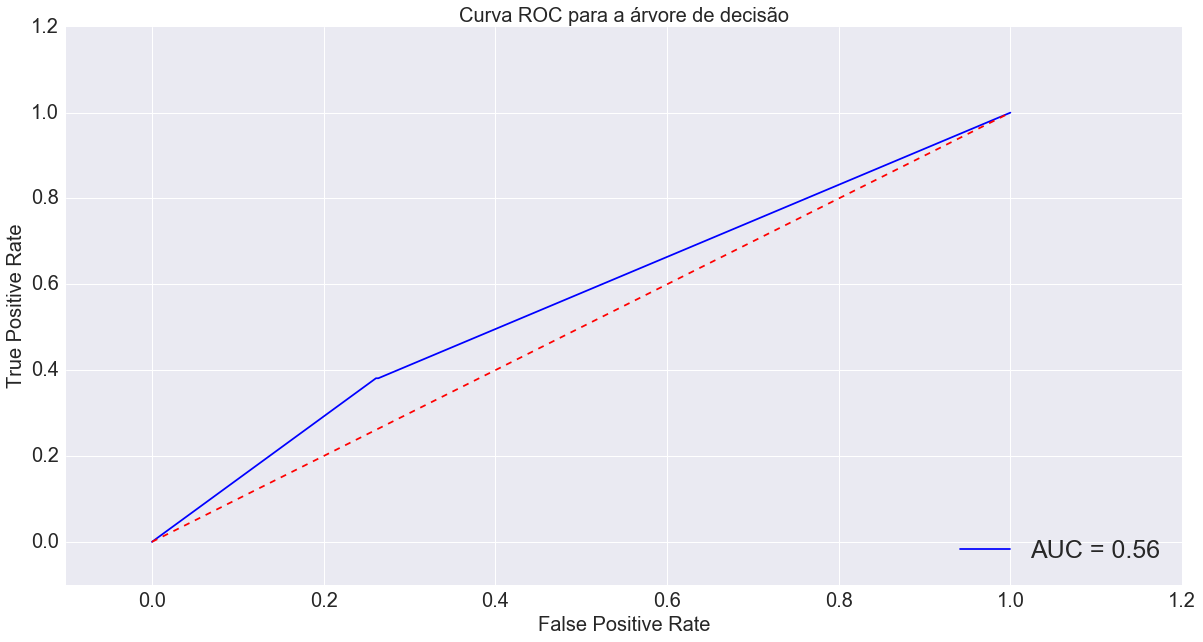

In [66]:
plt.figure(figsize=(20,10))
plt.title('Curva ROC para a árvore de decisão',fontsize=20)
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right',fontsize=25)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate',fontsize=20)
plt.xlabel('False Positive Rate',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()